In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

from imblearn.over_sampling import SMOTE

In [2]:
# loading datasets
actives = pd.read_csv('../../mold2_descriptors/2242_actives.csv')
inactives = pd.read_csv('../../mold2_descriptors/2242_inactives.csv')

In [3]:
print('actives:', len(actives))
print('inactives:', len(inactives))

actives: 715
inactives: 183379


In [4]:
# spliting datasets into test - train & validation
actives_test = actives.sample(n=300, random_state=42)
actives_train = actives.drop(actives_test.index)
inactives_test = inactives.sample(n=300, random_state=42)
inactives_train = inactives.drop(inactives_test.index)

In [6]:
df = pd.concat([actives_train, inactives_train[:600]], ignore_index=True)

In [7]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,2,0,0,2,2,0,0,0,0,0,...,0,1,0,0,0,5.28540,-0.798443,0.413793,3.18822,0
1,3,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,5.55459,-0.276209,0.529412,3.96809,0
2,1,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.35800,-0.672000,0.194000,2.46800,1
3,1,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,4.70044,-0.295978,0.285714,2.57062,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,4.52356,-0.001505,0.000000,-1.48188,0


In [8]:
X = df.drop(['activity'], axis=1)
y = df['activity']

In [9]:
y.value_counts()

0    600
1    415
Name: activity, dtype: int64

In [10]:
import matplotlib.pyplot as plt

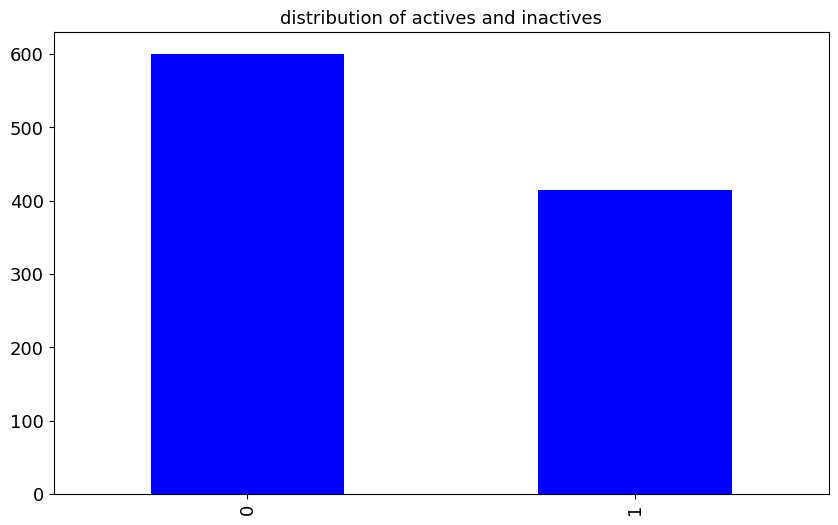

In [11]:
ax = y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='blue')
ax.set_title('distribution of actives and inactives', fontsize=13)
ax.set_alpha(0.5)

In [12]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# normalizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_validate)

In [14]:
over = SMOTE()
X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)

In [15]:
y_train_resampled.value_counts()

1    422
0    422
Name: activity, dtype: int64

Text(0.5, 1.0, 'distribution in sampled dataset')

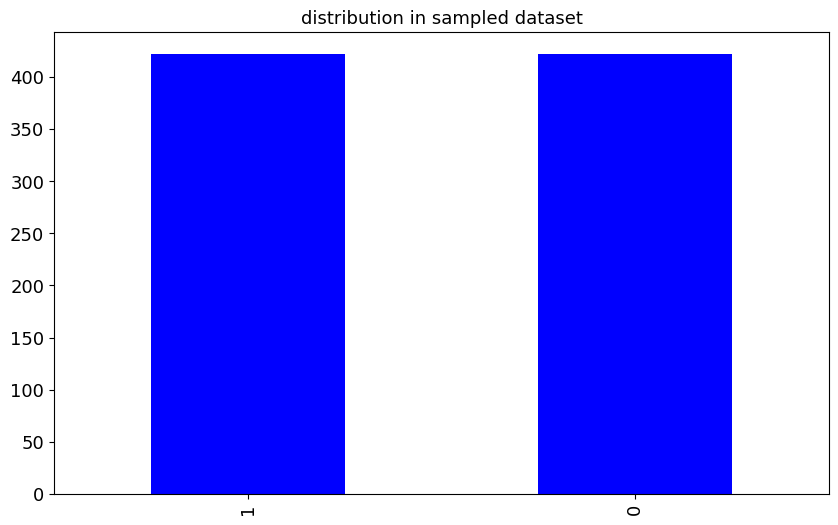

In [16]:
ax = y_train_resampled.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='blue')
ax.set_title('distribution in sampled dataset', fontsize=13)

## training model with oversampled data

In [17]:
import tensorflow as tf

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_validate, y_validate), epochs=100, batch_size=32)

Epoch 1/100
27/27 [==============================] - 2s 22ms/step - loss: 0.4830 - accuracy: 0.7891 - val_loss: 0.4416 - val_accuracy: 0.8033
Epoch 2/100
27/27 [==============================] - 0s 9ms/step - loss: 0.2252 - accuracy: 0.9123 - val_loss: 0.2452 - val_accuracy: 0.8951
Epoch 3/100
27/27 [==============================] - 0s 10ms/step - loss: 0.1321 - accuracy: 0.9538 - val_loss: 0.2472 - val_accuracy: 0.9049
Epoch 4/100
27/27 [==============================] - 0s 9ms/step - loss: 0.1061 - accuracy: 0.9621 - val_loss: 0.4049 - val_accuracy: 0.8820
Epoch 5/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0666 - accuracy: 0.9787 - val_loss: 0.2260 - val_accuracy: 0.9180
Epoch 6/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0305 - accuracy: 0.9858 - val_loss: 0.2818 - val_accuracy: 0.8984
Epoch 7/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0384 - accuracy: 0.9917 - val_loss: 0.4278 - val_accuracy: 0.9016
Epoch 8/1

### evaluating the model using the test data

In [21]:
# getting the test dataset
testing_data = pd.concat([actives_test, inactives_test], ignore_index=True)

In [22]:
len(testing_data)

600

In [23]:
testing_data['activity'].value_counts()

1    300
0    300
Name: activity, dtype: int64

In [24]:
testing_data.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,1,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,4.954,-0.280,0.231,3.149,1
1,1,0,0,2,2,0,0,0,0,0,...,0,1,0,0,1,5.285,-0.234,0.214,0.636,1
2,2,0,0,2,2,0,0,0,0,0,...,0,2,0,0,0,5.170,-0.658,0.444,3.317,1
3,2,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,5.170,-0.823,0.444,3.307,1
4,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,4.858,-0.717,0.000,1.820,1


In [25]:
testing_data_x = testing_data.drop(['activity'], axis=1)
print(len(testing_data_x))
testing_data_x = scaler.transform(testing_data_x)
testing_data_y = testing_data['activity']

600


In [26]:
model.evaluate(testing_data_x, testing_data_y, verbose=2)

19/19 - 0s - loss: 3.6500 - accuracy: 0.7700 - 232ms/epoch - 12ms/step


[3.650043249130249, 0.7699999809265137]

### evaluating model's performance with F1 score, precision, recall, etc

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
inactives_test_x = inactives_test.drop(['activity'], axis=1)
inactives_test_x = scaler.transform(inactives_test_x)
actives_test_x = actives_test.drop(['activity'], axis=1)
actives_test_x = scaler.transform(actives_test_x)

In [29]:
y_true_actives = np.array([1] * len(actives_test_x))
y_true_inactives = np.array([0] * len(inactives_test_x))
y_true = np.concatenate((y_true_actives, y_true_inactives))

There are both y_pred and y_pred_rounded because the model outputs a probability and we need to round it to get the class.


y_pred will be used to calculate the ROC curve and the AUC.


y_pred_rounded will be used to calculate the confusion matrix.

In [30]:
y_pred_actives = model.predict(actives_test_x)
y_pred_actives_rounded = (y_pred_actives > 0.5).astype(int).reshape(len(y_pred_actives, ))
y_pred_inactives = model.predict(inactives_test_x)
y_pred_inactives_rounded = (y_pred_inactives > 0.5).astype(int).reshape(len(y_pred_inactives, ))
y_pred = np.concatenate((y_pred_actives, y_pred_inactives))
y_pred_rounded = np.concatenate((y_pred_actives_rounded, y_pred_inactives_rounded))

10/10 [==============================] - 0s 2ms/step


In [31]:
accuracy = accuracy_score(y_true, y_pred_rounded)
precision = precision_score(y_true, y_pred_rounded)
recall = recall_score(y_true, y_pred_rounded)
f1 = f1_score(y_true, y_pred_rounded)

In [32]:
print("accuracy is {}".format(accuracy))
print("precision is {}".format(precision))
print("recall is {}".format(recall))
print("f1 is {}".format(f1))

accuracy is 0.77
precision is 0.7142857142857143
recall is 0.9
f1 is 0.7964601769911505


Drawing the ROC curve to enable us to carry out threshold moving,

In [33]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)

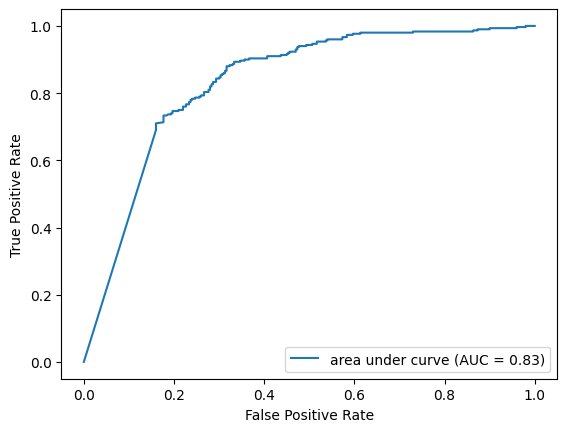

In [34]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='area under curve')
display.plot()
plt.show()

In [44]:
fav_thresholds = []
for i in range(len(thresholds)):
    if fpr[i] < 0.3 and tpr[i] > 0.8:
        fav_thresholds.append((i, thresholds[i], fpr[i], tpr[i]))

In [45]:
for i in fav_thresholds:
    print(i)

(32, 0.99964434, 0.26666666666666666, 0.8033333333333333)
(33, 0.999085, 0.27666666666666667, 0.8033333333333333)
(34, 0.9987894, 0.27666666666666667, 0.81)
(35, 0.99872845, 0.28, 0.81)
(36, 0.99763423, 0.28, 0.82)
(37, 0.9972542, 0.2833333333333333, 0.82)
(38, 0.9970312, 0.2833333333333333, 0.8266666666666667)
(39, 0.99697113, 0.2866666666666667, 0.8266666666666667)
(40, 0.99666697, 0.2866666666666667, 0.8333333333333334)
(41, 0.9947223, 0.29333333333333333, 0.8333333333333334)
(42, 0.9912617, 0.29333333333333333, 0.8433333333333334)


In [46]:
selected_threshold = fav_thresholds[-1][1]
selected_threshold

0.9912617

In [47]:
y_pred_actives_rounded2 = (y_pred_actives > selected_threshold).astype(int).reshape(len(y_pred_actives, ))
y_pred_inactives_rounded2 = (y_pred_inactives > selected_threshold).astype(int).reshape(len(y_pred_inactives, ))
y_pred_rounded2 = np.concatenate((y_pred_actives_rounded2, y_pred_inactives_rounded2))

In [48]:
accuracy = accuracy_score(y_true, y_pred_rounded2)
precision = precision_score(y_true, y_pred_rounded2)
recall = recall_score(y_true, y_pred_rounded2)
f1 = f1_score(y_true, y_pred_rounded2)

In [49]:
print("accuracy is {}".format(accuracy))
print("precision is {}".format(precision))
print("recall is {}".format(recall))
print("f1 is {}".format(f1))

accuracy is 0.7733333333333333
precision is 0.7411764705882353
recall is 0.84
f1 is 0.7875000000000001
